In [13]:
import pandas as pd
import re
import seaborn as sns

#### Data Read-in

In [4]:
inputfile_dir = r"C:\Users\ZHAN\Documents\Udacity\DS\project1"
df_calendar = pd.read_csv(inputfile_dir + "\\calendar.csv")
df_reviews = pd.read_csv(inputfile_dir + "\\reviews.csv")
df_listings = pd.read_csv(inputfile_dir + "\\listings.csv")
###########################################################

#### Q1: The current avaliable listings by month as of 09/2016

In [6]:
def _add_month_year(df):
    df['month'] = df['date'].str[5:7]
    df['year'] = df['date'].str[:4]
    return df
###################################
def listings_bymonth(df):
    df = _add_month_year(df)
###################################################
    # year_13_17 = ["2017", "2016", "2015", "2014", "2013"]
###################################################
    # return df["year"]
    return df[df["available"] == "t"].groupby(["year", "month"])["listing_id"].count()
################################
listings_bymonth(df_calendar)

year  month
2016  09       24401
      10       46345
      11       58888
      12       60997
2017  01       63181
      02       56810
      03       55181
      04       51382
      05       53600
      06       52731
      07       54963
      08       55561
      09        8997
Name: listing_id, dtype: int64

#### Q2: What about the trend of reviewers by month and year (2013 - 2016)
 - Year total increases constantly.
 - Reviewer number peaks at 9, 10, 11 every year; This could be a great time for any marketing interventions. 

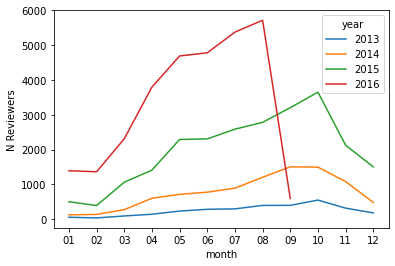

In [24]:
###################################
def find_n_visitor_bymonth(df):
    df = _add_month_year(df)
###################################################
    year_13_17 = ["2017", "2016", "2015", "2014", "2013"]
###################################################
    return df[df["year"].isin(year_13_17)].groupby(["year", "month"])["reviewer_id"].count()
# we can tell that volumes pick up from May every year and reach the peak at Oct.
find_n_visitor_bymonth(df_reviews)
def plot_nvisitor_bymonth(df):
    df = find_n_visitor_bymonth(df).reset_index()
    # return df
    ax = sns.lineplot(x='month', y='reviewer_id', hue='year', data = df)
    ax.set(ylabel='N Reviewers')
#################################################
plot_nvisitor_bymonth(df_reviews)

#### Q3: If one wants to rent entire apt/townhose/condo, what are the top 10 neighbourhood providing the most such units?

In [27]:
def top10_listed_rooms_neighbors(df, property_type = ["Apartment", "Condominium", "Townhouse"]):
    ####################################################################
    # df["street_short"] = df["street"].apply(lambda x: "".join(re.findall("(.+), MA", x)))
    grp_vars = ['neighbourhood', 'zipcode', 'property_type', "bedrooms"] # filter columns that are needed
    df = df[df['property_type'].isin(property_type) & df['room_type'].str.contains("Entire")] # filter apt/condo/townhouse
    return df.groupby(grp_vars).agg({"id":"count"}).sort_values("id", ascending = False)[:10] # find top 10
#############################################
top10_listed_rooms_neighbors(df_listings)

id
neighbourhood  zipcode property_type bedrooms    
Fenway/Kenmore 02215   Apartment     1.0       77
South End      02118   Apartment     1.0       61
Fenway/Kenmore 02215   Apartment     2.0       59
Back Bay       02116   Apartment     1.0       57
                                     2.0       52
Beacon Hill    02114   Apartment     1.0       42
Jamaica Plain  02130   Apartment     2.0       41
Back Bay       02116   Apartment     0.0       37
South End      02118   Apartment     2.0       35
North End      02113   Apartment     1.0       34